# Importing libraries

In [58]:
#importing libraries
import pandas as pd
import urllib.request 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Utility Functions

In [59]:
#utility function for parsing JSONdata
def parseData(fname):
    for l in urllib.request.urlopen(fname):
        yield eval(l)


# Reading the Dataset and Exploring their Structure

In [60]:
# loading and parsing JSONdata
data  =list(parseData("http://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json"))

In [61]:
type(data)

list

In [62]:
df = pd.DataFrame(data)

In [63]:
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,1.5,A lot of foam. But a lot.\tIn the smell some b...,"{'isdst': 0, 'wday': 0, 'mon': 2, 'hour': 20, ...",1234817823,NaN,NaN,NaN,NaN,stcules
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,3.0,"Dark red color, light beige foam, average.\tIn...","{'isdst': 0, 'wday': 6, 'mon': 3, 'hour': 13, ...",1235915097,NaN,NaN,NaN,NaN,stcules
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,"Almost totally black. Beige foam, quite compac...","{'isdst': 0, 'wday': 6, 'mon': 3, 'hour': 14, ...",1235916604,NaN,NaN,NaN,NaN,stcules
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,3.0,"Golden yellow color. White, compact foam, quit...","{'isdst': 0, 'wday': 6, 'mon': 2, 'hour': 19, ...",1234725145,NaN,NaN,NaN,NaN,stcules
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,4.5,"According to the website, the style for the Ca...","{'isdst': 0, 'wday': 3, 'mon': 12, 'hour': 18,...",1293735206,3.581417e+09,"Jun 16, 1901",-2.163082e+09,Male,johnmichaelsen


In [64]:
df.describe()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,50000.000000,50000.0000,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,1.047900e+04,1.047900e+04
mean,7.400287,3.8984,3.871520,3.88871,3.852670,3.922250,1.232761e+09,1.174785e+09,2.435502e+08
std,2.317491,0.5898,0.682541,0.70174,0.666309,0.716645,7.193478e+07,3.346479e+08,3.346479e+08
min,0.100000,0.0000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,5.400000,3.5000,3.500000,3.50000,3.500000,3.500000,1.189388e+09,9.782714e+08,1.418508e+08
50%,6.900000,4.0000,4.000000,4.00000,4.000000,4.000000,1.248142e+09,1.100009e+09,3.183264e+08
75%,9.400000,4.5000,4.500000,4.50000,4.500000,4.500000,1.291320e+09,1.276485e+09,4.400640e+08
max,57.700000,5.0000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [65]:
df.columns

Index(['beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name', 'beer/style',
       'review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste', 'review/text', 'review/timeStruct', 'review/timeUnix',
       'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix',
       'user/gender', 'user/profileName'],
      dtype='object')

In [66]:
df.shape

(50000, 18)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
beer/ABV             50000 non-null float64
beer/beerId          50000 non-null object
beer/brewerId        50000 non-null object
beer/name            50000 non-null object
beer/style           50000 non-null object
review/appearance    50000 non-null float64
review/aroma         50000 non-null float64
review/overall       50000 non-null float64
review/palate        50000 non-null float64
review/taste         50000 non-null float64
review/text          50000 non-null object
review/timeStruct    50000 non-null object
review/timeUnix      50000 non-null int64
user/ageInSeconds    10479 non-null float64
user/birthdayRaw     10479 non-null object
user/birthdayUnix    10479 non-null float64
user/gender          20403 non-null object
user/profileName     50000 non-null object
dtypes: float64(8), int64(1), object(9)
memory usage: 6.9+ MB


In [68]:
#extracting categorical features
categorical_features = df.select_dtypes(include=[np.object])

In [69]:
#shape of categorical data
categorical_features.shape

(50000, 9)

In [70]:
#columns having categorical data
categorical_features.columns

Index(['beer/beerId', 'beer/brewerId', 'beer/name', 'beer/style',
       'review/text', 'review/timeStruct', 'user/birthdayRaw', 'user/gender',
       'user/profileName'],
      dtype='object')

In [71]:
#extracting numeric features
numeric_features = df.select_dtypes(include=[np.number])

In [72]:
#checking shape of numeric features
numeric_features.shape

(50000, 9)

In [73]:
#columns having numeric data
numeric_features.columns

Index(['beer/ABV', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/timeUnix', 'user/ageInSeconds',
       'user/birthdayUnix'],
      dtype='object')

In [74]:
numeric_features.describe()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,50000.000000,50000.0000,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,1.047900e+04,1.047900e+04
mean,7.400287,3.8984,3.871520,3.88871,3.852670,3.922250,1.232761e+09,1.174785e+09,2.435502e+08
std,2.317491,0.5898,0.682541,0.70174,0.666309,0.716645,7.193478e+07,3.346479e+08,3.346479e+08
min,0.100000,0.0000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,5.400000,3.5000,3.500000,3.50000,3.500000,3.500000,1.189388e+09,9.782714e+08,1.418508e+08
50%,6.900000,4.0000,4.000000,4.00000,4.000000,4.000000,1.248142e+09,1.100009e+09,3.183264e+08
75%,9.400000,4.5000,4.500000,4.50000,4.500000,4.500000,1.291320e+09,1.276485e+09,4.400640e+08
max,57.700000,5.0000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


numeric features are discrete in nature

In [75]:
#checking missing values in data
null_values_per_col =  df.isnull().sum().sort_values(ascending = False)
percent = ( df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
missing_data.head(30)

,Total,Percent
user/birthdayUnix,39521,0.79042
user/birthdayRaw,39521,0.79042
user/ageInSeconds,39521,0.79042
user/gender,29597,0.59194
user/profileName,0,0.00000
review/aroma,0,0.00000
beer/beerId,0,0.00000
beer/brewerId,0,0.00000
beer/name,0,0.00000
beer/style,0,0.00000


In [76]:
#checking missing values in numeric_features  
null_values_per_col =  numeric_features.isnull().sum().sort_values(ascending = False)
percent = ( numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
missing_data.head(30)

,Total,Percent
user/birthdayUnix,39521,0.79042
user/ageInSeconds,39521,0.79042
review/timeUnix,0,0.00000
review/taste,0,0.00000
review/palate,0,0.00000
review/overall,0,0.00000
review/aroma,0,0.00000
review/appearance,0,0.00000
beer/ABV,0,0.00000


In [77]:
#checking missing values in categorical_features  
null_values_per_col =  categorical_features.isnull().sum().sort_values(ascending = False)
percent = ( categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
missing_data.head(30)

,Total,Percent
user/birthdayRaw,39521,0.79042
user/gender,29597,0.59194
user/profileName,0,0.00000
review/timeStruct,0,0.00000
review/text,0,0.00000
beer/style,0,0.00000
beer/name,0,0.00000
beer/brewerId,0,0.00000
beer/beerId,0,0.00000


# 1. review/overall = α + β*year:

In [78]:
#Let's check date of Manufacturing
categorical_features["review/timeStruct"].head()


0    {'isdst': 0, 'wday': 0, 'mon': 2, 'hour': 20, ...
1    {'isdst': 0, 'wday': 6, 'mon': 3, 'hour': 13, ...
2    {'isdst': 0, 'wday': 6, 'mon': 3, 'hour': 14, ...
3    {'isdst': 0, 'wday': 6, 'mon': 2, 'hour': 19, ...
4    {'isdst': 0, 'wday': 3, 'mon': 12, 'hour': 18,...
Name: review/timeStruct, dtype: object

In [79]:
print(type(categorical_features["review/timeStruct"]))

<class 'pandas.core.series.Series'>


Parsing a "review/timeStruct" dictionary in a pandas dataframe cell into new columns


In [80]:
df1 = df["review/timeStruct"].apply(pd.Series)
df.drop(["review/timeStruct"], axis=1, inplace=True)

In [81]:
df.shape

(50000, 17)

In [83]:
df1.head()

,hour,isdst,mday,min,mon,sec,wday,yday,year
0,20,0,16,57,2,3,0,47,2009
1,13,0,1,44,3,57,6,60,2009
2,14,0,1,10,3,4,6,60,2009
3,19,0,15,12,2,25,6,46,2009
4,18,0,30,53,12,26,3,364,2010


In [84]:
df = pd.concat([df, df1], axis=1)

In [85]:
df.shape

(50000, 26)

 Modelling

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(df['year'].reshape(-1, 1), df['review/overall'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

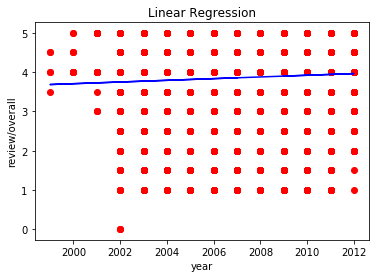

In [87]:
# Visualising the Linear Regression results
plt.scatter(df['year'].reshape(-1, 1), df['review/overall'], color = 'red')
plt.plot(df['year'].reshape(-1, 1), regressor.predict(df['year'].reshape(-1, 1)), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('year')
plt.ylabel('review/overall')
plt.show()



review/overall =  α + β*year:

In [88]:
β = regressor.coef_
print(β)

[0.02143798]


In [89]:
#intercept of regression line 
α = regressor.intercept_
print(α)

-39.1707489364172
